# Data visualisation task

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html)

In [9]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 125.3 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.164.0
    Uninstalling google-api-python-client-2.164.0:
      Successfully uninstalled google-api-python-client-2.164.0


In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Load data
worksheet = gc.open('Cars93').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

### 1. Boxplot

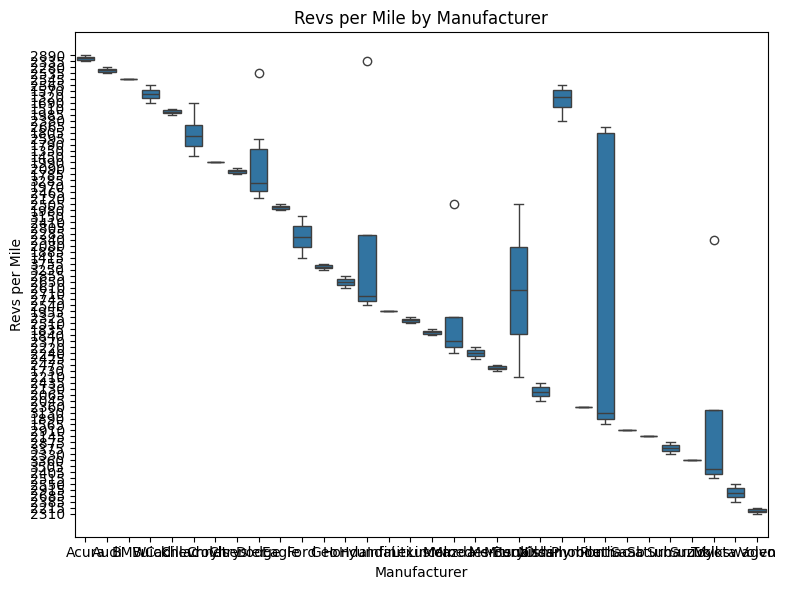

In [14]:
# Boxplot for revs per mile

subset = df

plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x='Manufacturer', y='Rev.per.mile')
plt.title('Revs per Mile by Manufacturer')
plt.ylabel('Revs per Mile')
plt.xlabel('Manufacturer')
plt.tight_layout()
plt.show()

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:** Geo with the Metro model has 3755 Revs per mile, which is the highest


### 2. Histogram

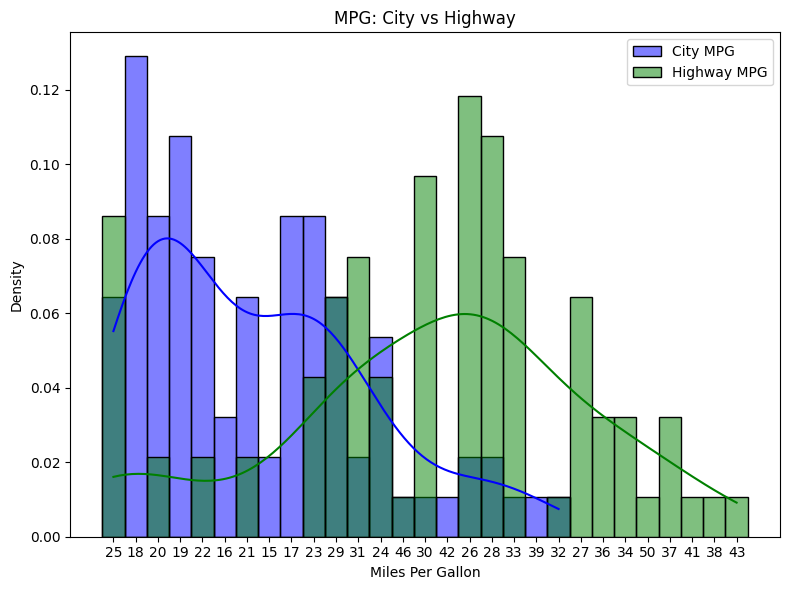

In [15]:
# Histogram of MPG

plt.figure(figsize=(8, 6))
sns.histplot(df['MPG.city'], color='blue', label='City MPG', kde=True, stat="density", bins=15, alpha=0.5)
sns.histplot(df['MPG.highway'], color='green', label='Highway MPG', kde=True, stat="density", bins=15, alpha=0.5)
plt.title('MPG: City vs Highway')
plt.xlabel('Miles Per Gallon')
plt.legend()
plt.tight_layout()
plt.show()

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:** Yes, it is generally more fuel efficient to drive on the highway. The average MPG in the city is approximately 22.37 MPG, while the highway is approximately 29.09 MPG

### 3. Lineplot

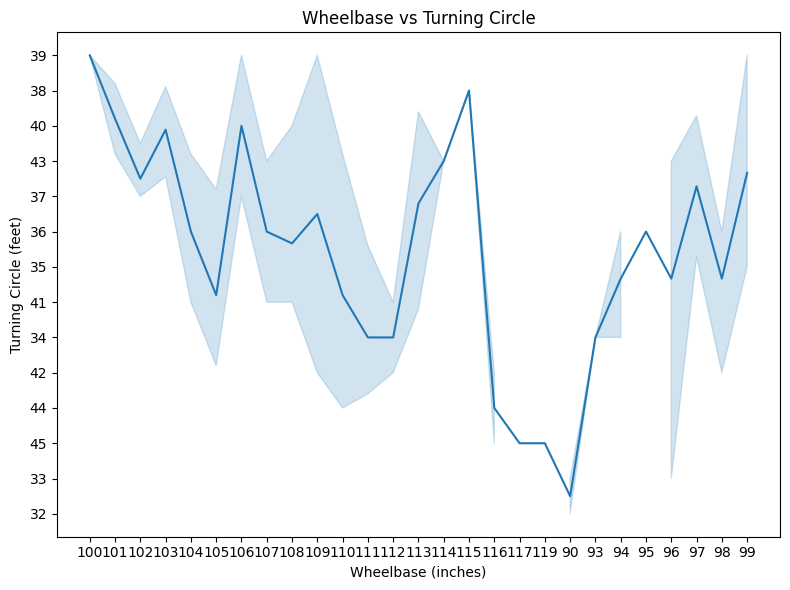

In [16]:
# Lineplot (Wheelbase vs turning circle)

sorted_df = df.sort_values('Wheelbase')

plt.figure(figsize=(8, 6))
sns.lineplot(x='Wheelbase', y='Turn.circle', data=sorted_df)
plt.title('Wheelbase vs Turning Circle')
plt.xlabel('Wheelbase (inches)')
plt.ylabel('Turning Circle (feet)')
plt.tight_layout()
plt.show()


**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:** The correlation with wheelbase is as follows:

1. Length: 0.82
2. Weight: 0.87
3. Horsepower: 0.49

As the wheelbase increases, the cars tend to become longer, heavier and more powerful


### 4. Barplot

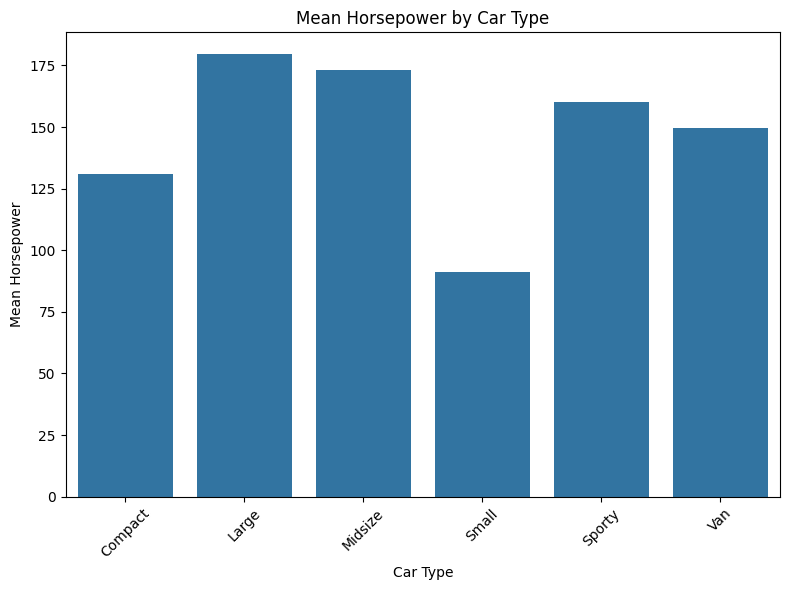

In [18]:
# Barplot for mean horsepower

df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

mean_hp = df.groupby('Type')['Horsepower'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Horsepower', data=mean_hp)
plt.title('Mean Horsepower by Car Type')
plt.ylabel('Mean Horsepower')
plt.xlabel('Car Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:** Yes, larger cars tend to have more horsepower